# scaling the model and analyze the coefficients and residuals.


- training a model with scaled data, i going to scale the data with a standarScaler()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib


In [35]:
data = pd.read_csv("../data/processed/StudentsPerformance_processed.csv")
data.head()

,gender,parental level of education,math score,reading score,writing score,lunch_standard,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,72,72,74,True,True,False,True,False,False,False
1,1,2,69,90,88,True,False,False,False,True,False,False
2,1,5,90,95,93,True,True,False,True,False,False,False
3,0,3,47,57,44,False,True,True,False,False,False,False
4,0,2,76,78,75,True,True,False,False,True,False,False


- select the columns to scale (no booleans) and scale the data
we can´t to scale the math score because is the target, and it doen´t have a big values (not necessary)

- also put the target at the end of the data

In [36]:
X = data.drop(columns = ['math score'])
y = data['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaled_columns = ['parental level of education', 'reading score', 'writing score']
bool_columns = [c for c in X.columns if c not in scaled_columns]

scaler = StandardScaler()
X_train_scaled_columns = scaler.fit_transform(X_train[scaled_columns])

X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled_columns, columns=scaled_columns),
                        X_train[bool_columns].reset_index(drop=True)], axis=1)

X_test_scaled_columns = scaler.fit_transform(X_test[scaled_columns])
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled_columns, columns=scaled_columns),
                        X_test[bool_columns].reset_index(drop=True)], axis=1)



- training the scaled_model

In [37]:
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
y_pred = scaled_model.predict(X_test_scaled)
r2_scaled_01 = r2_score(y_test, y_pred)
print("R^2: ", r2_scaled_01)

R^2:  0.8628641247089452


* saving the scaled model

In [38]:

route = '../models/scaled_model.pkl'
joblib.dump(scaled_model, route)
model_test = joblib.load(route)
print("test prediction:", model_test.predict(X_test_scaled[:2]))

test prediction: [77.73267043 60.0055076 ]


* obtaining the coefficients of the scaled model

In [39]:
scaled_coefficients = pd.DataFrame({
    'variables':  X_train_scaled.columns,
    'coefficients': scaled_model.coef_,
    'impact': np.abs(scaled_model.coef_)
}).sort_values(by='impact', ascending=False)

print(scaled_coefficients)
print(f"B_0: {scaled_model.intercept_}")

                       variables  coefficients     impact
3                         gender    -13.095750  13.095750
2                  writing score     10.946755  10.946755
10        race/ethnicity_group E      4.116733   4.116733
4                 lunch_standard      3.534778   3.534778
1                  reading score      3.370908   3.370908
5   test preparation course_none      3.313586   3.313586
9         race/ethnicity_group D     -1.417533   1.417533
8         race/ethnicity_group C     -1.397844   1.397844
6         race/ethnicity_group A     -0.846152   0.846152
0    parental level of education     -0.620743   0.620743
7         race/ethnicity_group B     -0.455204   0.455204
B_0: 69.29439332721046


* graph the variables impact

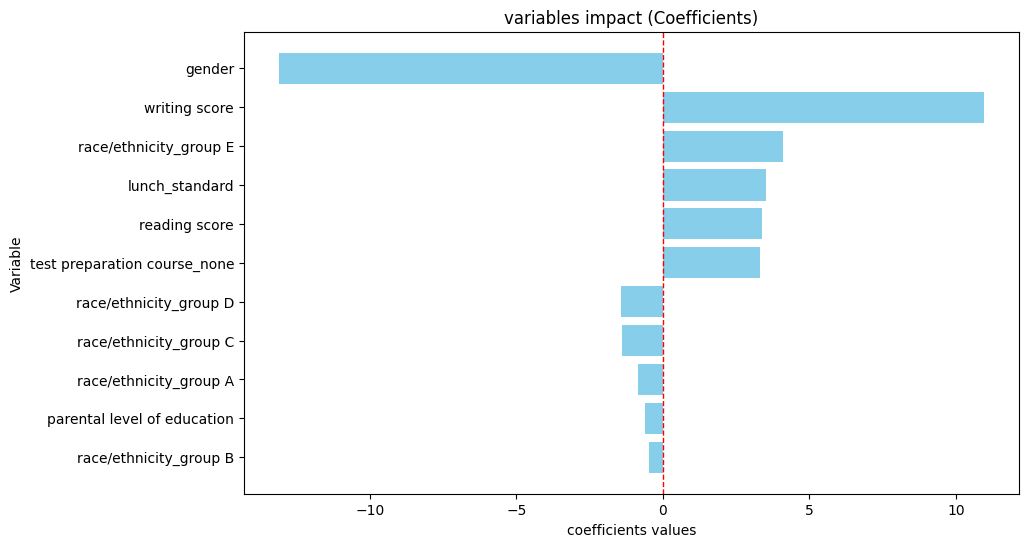

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.barh(scaled_coefficients['variables'], scaled_coefficients['coefficients'], color='skyblue')
plt.xlabel('coefficients values')
plt.ylabel('Variable')
plt.title('variables impact (Coefficients)')
plt.gca().invert_yaxis()
plt.axvline(0, color='red', linestyle='--', linewidth=1)  
plt.savefig("../images/coefficients.png", dpi=300, bbox_inches='tight')
plt.show()

## Comparing the coefficients and metrics between baseline_model and scaled_model

Models:

In [41]:
scaled = scaled_model
unscaled = joblib.load('../models/baseline_model.pkl') 

creating a dataframe of the unscaled model coefficients

In [47]:
unscaled_coefficients = pd.DataFrame({
    'variables': X_train.columns,
    'coefficients': unscaled.coef_,
    'impact': np.abs(unscaled.coef_)
}).sort_values(by='impact', ascending=False)

print('unscaled model:\n', scaled_coefficients, 
      '\n----------------------------\n', 
      'scaled model: \n', unscaled_coefficients)
print(f"\nB_0 Unscaled: {unscaled.intercept_}\nB_0 Scaled {scaled.intercept_}")

unscaled model:
                        variables  coefficients     impact
3                         gender    -13.095750  13.095750
2                  writing score     10.946755  10.946755
10        race/ethnicity_group E      4.116733   4.116733
4                 lunch_standard      3.534778   3.534778
1                  reading score      3.370908   3.370908
5   test preparation course_none      3.313586   3.313586
9         race/ethnicity_group D     -1.417533   1.417533
8         race/ethnicity_group C     -1.397844   1.397844
6         race/ethnicity_group A     -0.846152   0.846152
0    parental level of education     -0.620743   0.620743
7         race/ethnicity_group B     -0.455204   0.455204 
----------------------------
 scaled model: 
                        variables  coefficients     impact
0                         gender    -13.095750  13.095750
10        race/ethnicity_group E      4.116733   4.116733
4                 lunch_standard      3.534778   3.534778
5   test

In [ ]:
unscaled.coef_.sort

<function ndarray.sort>

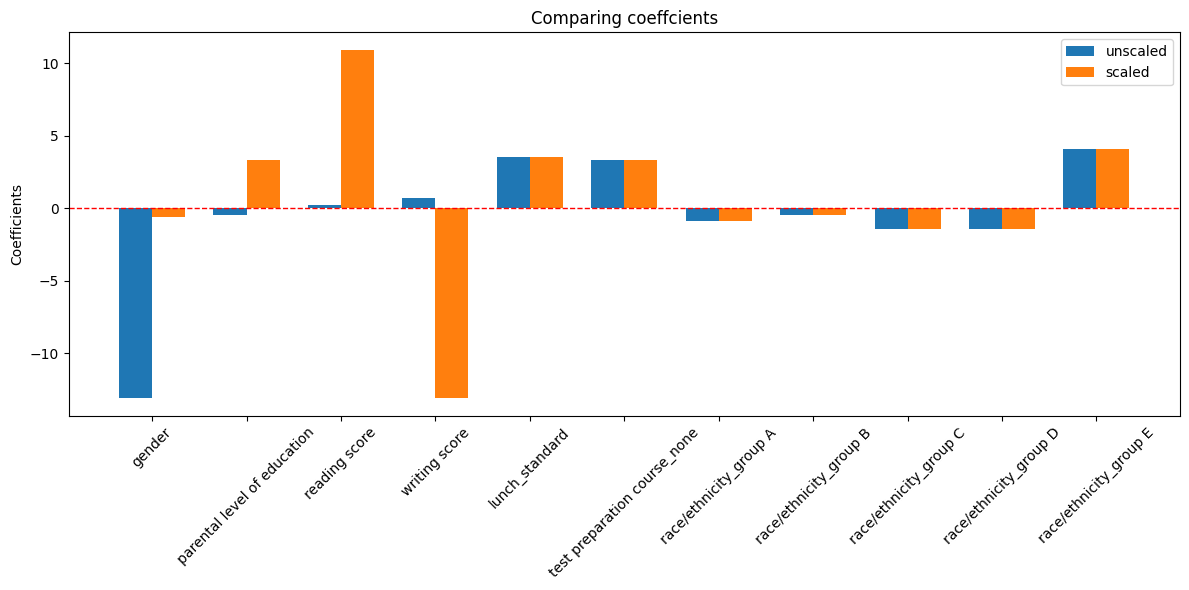

In [64]:
variables = X_train.columns
coef_no_scale = unscaled.coef_
coef_scale = scaled.coef_

x = np.arange(len(variables))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, coef_no_scale, width, label='unscaled')
plt.bar(x + width/2, coef_scale, width, label='scaled')

plt.xticks(x, variables, rotation=45)
plt.ylabel('Coefficients')
plt.title('Comparing coeffcients')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.legend()
plt.tight_layout()
plt.show()

We see that when numerical variables are not scaled, it is not possible to see their importance at the time of prediction. When we scale them, we can see that the writing score characteristic has a significant impact on the result, which is not visible without scaling. However, the gender variable remains the same, as it has the same value in both databases (int female:1, male: 0).